# Метод градиентного спуска

### Модель задачи машинного обучения

$$F(X,T) \to Y $$

- X – признаки
- T - параметры модели
- Y - прогнозы модели

Задача: подобрать такие параметры $T$, чтобы получить максимально точный прогноз. Для этого нужно определить:

    1."максмимально точный прогноз"
    2. как признаки подобирать

#### Функция потерь

Функция принимает на вход два параметра: предсказанные и экспериментальные значения.
Ранее мы рассматривали простейший пример обучения модели бинарной линейной классификации в виде

$$
a(x,\omega) = sign(\langle \omega, y \rangle) = \begin{cases} \text{-1, x} \in \mathbf{C_1} \\
\text{1, x} \in \mathbf{C_1}
\end{cases}
$$

где $\omega = [ \omega_0, \omega_1, \omega_2, \dots , \omega_n ]^T --- $ вектор настраиваемых в процессе обучения параметров. 

Начнём с определения показателей качества. На предыдущем занятии он у нас вычислялся по количесвту неверно классифицируемых наблюдений:

$$
Q(a, X) = \sum\limits_{i=1}^{k} [ M_i < 0 ] \to \text{min}
$$

где $M_i=\langle \omega, x_i \rangle \cdot y_i $ 

- $V(M) = (1-M)$ --- кусочно-линейная(SVM)
- $L(M) = \log_2 (1+e^{-M})$ --- логарифмическая(LR)
- $Q(M) = (1-M)^2$ --- квадратичная(FLD)
- $S(M) = 2\cdot(1+e^{M})^{-1}$ --- сигмоидная(ANN)
- $E(M) = e^{-M} $ --- экспоненциальная(AdaBoost)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

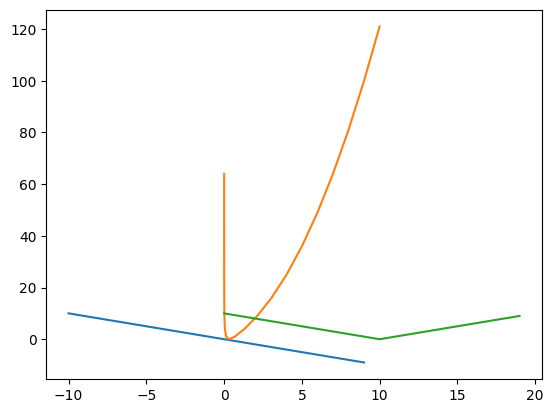

In [2]:
x = [i for i in range(-10,10,1)]
y1 = list(map(lambda i: i*(-1), x))
y3 = list(map(lambda i: np.log(1+np.exp(-i)), x))
y4 = list(map(lambda i: (1 - i)**2, x))
y5 = list(map(lambda i: np.abs(i), x))
y =list(map(lambda i:  np.sign(i), x))
plt.plot(x, y1,y3,y4,y5)

### Mean squared error

$$
J = \frac{1}{N}\sum\limits_{i=1}^{N}(y_i - \langle \omega , x \rangle )
$$

Для самой простой модели $h_{\theta}(x_i) = \theta_0 + \theta_1 x$. Мы предполагаем, что целевое значение $Y$ линейно зависит от входных данных $x$ с добавлением шума: 

$Y = \theta_0 + \theta_1 x + \eta$

- $\theta$ --- параметры модели
- $ x $ --- объект, для которого делаем предсказания
- $\eta$ --- шум в данных


Считаем, что шум имеет нормальное распределение с математическим ожиданием 0 и дисперсией 1. Тогда:

$$E[Y] = E[\theta_0 + \theta_1 x + \eta] = \theta_0 + \theta_1 x$$
$$ Var[Y] = Var[\theta_0 + \theta_1 x + \eta] = 1 $$


- $E$ --- математическое ожидание
- $Var$ --- дисперсия
- $\theta$ --- параметры модели
- $\eta$ --- случайные (непрогнозируемые) шумы


### Вывод MSE

Распишем вероятность наблюдать значение $y_i$ для входящего $x_i$ (по формуле плотности нормального распределения):

$$p(y_i | x) = \exp{-\frac{(y_i - (\theta_0 + \theta_1 x))^2}{2}}$$

- $\theta$ --- параметры модели
- $x$ --- объект, для которого делаем предсказания
- $y$ --- истинное значение

В предположении, что входыне данные независимые и одинаково распределённые, запишем правдоподобие нашей модели:


$$L(x,y) =\prod\limits_{i=1}^{N} \exp{-\frac{(y_i - (\theta_0 + \theta_1 x))^2}{2}}$$

Наша задача --- побобрать такие параметры $\theta_{0,1}$, чтобы максимизировать правдоподобие (вероятность наблюдать такие предсказания $у$ при указанных значениях $x$)

Перейдём к максимизации правдоподобия логарифма правдоподобия:


$l(x,y) = -\frac{1}{2N}\sum\limits_{i=1}^{N}{(y_i - (\theta_0 + \theta_1 x))^2}$


### Mean absolute error

$l(x,y) = -\frac{1}{N}\sum\limits_{i=1}^{N}{|y_i - (\theta_0 + \theta_1 x)|}$

$L1-$ функция потерь мохожа на $L2$, но вместо того, чтобы брать квадрат расстояния, берётся его модуль.

- $L1-$ более устойчивая к выбросам, потому что она "не взрывается" при больших значениях
- В нуле нарушается условие гладкости

### Huber loss

Функция потерь Хубьера --- это функция потерь, которая менеее чувстививтельан к выбросам, чес квадратичная оошибка. 

$$
L_{\delta}(a) = \delta^2 \Big(\sqrt{1+\frac{a}{\delta}^2} - 1 \Big)
$$


### Функция потерь для задачи классификации

- Бинарная кросс-энтропия (binary cross-entropy)
- Многоклассовая кросс-энтропия


### Бинарная кросс-энтропия

Кросс-энтропия измеряет расхождения между двумя вероятностными расспределениями:

$$
J = - \sum\limits_{i=1}{N} y_i log (h_{\theta}(x_i)) + (1-y_i)log(1-h_{\theta}(x_i))
$$
- N --- количество наблюдейни
- y_i --- истинное значение 
- $h_{\theta} x_i$ --- вероятность принадлежности первому классу



### Вывод бинарной кросс-энтропии

Рассмотрим задачу классификации. Предположим, что ответ нашей модели $h_{\theta}x_i$ получен на основе логистической регрессии $\sigma(\langle \omega, x \rangle)$. Её значение лежат в диапозоне от 0 до 1, что может быть интерперитировано как вероятность, что $x_i$ принадлежит positive-классу.

$$
p(y_i = 1| x_i) = h_{\theta}(x_i)
$$
$$
p(y_i = 0| x_i) =1 - h_{\theta}(x_i)
$$

- $x_i$ --- объект, для которого делаем предсказания
- $y_i$ --- истинное значение
- $h_{\theta}(x_i)$ --- вероятность принадлежности первому классу
- $p$ --- вероятность наблюдать значение $y$ для входящего $x$


Таким образом, объединим два уравнения в одно$p(y_i| x_i) = (h_{\theta}(x_i))^{y_i}(1 - h_{\theta}(x_i))^{1-y_i}$ нам необходимо максимизировать функцию

$$
L(x,y) = \prod\limits_{i=1}^{N}(h_{\theta}(x_i))^{y_i}(1 - h_{\theta}(x_i))^{1-y_i}
$$


Далее, также как и в случае MSE, возъмём логарифм и инвертируем знак. Получим функцию потерь
$$
J(x,y) = -\sum\limits_{i=1}^{N}{y_i}log(h_{\theta}(x_i))+({1-y_i})log(1 - h_{\theta}(x_i))
$$

#### функция потерь vs метрика качества

Функция потерь --- формальный функционал, который оптимизируется в процессе обучения модели.

Метрика качества --- способ оценить качество модели, возможно, под другим углом.

Строго говоря, в общем случае, они не совпадают:

- для задачи регрессии **метрика = функция потерь(MSE)**
- для задачи классификации **метрика != функция потерь (logloss/accuracy)**

# Методы оптимизации

**Оптимизация** --- нахождения экстремума (минимума или максимума) целевой функции в некоторой области конечномерного векторного пространства, ограниченной набором линейных и/или нелинейных неравенств.


#### **Градиентный спуск**

Оптимизационный алгоримт для поиска локального минимума функции. Относится к методам первого порядка. Для поиска минимума делаем шак в направлении, обратном градиенту функции.

Основной метод оптимизации в нейронных сетях.


### Алгоритм градиентного спуска

1. Выбираем начальное приближение $w_0$
2. Цикл по $k=1,2,3,\dots$


- $S_k = - \nabla Q(w^{k-1}, X $ 
- $ w^k = w^{k-1} + \eta_k s_k $
- Если $ || w^k - w^{k-1} || < \epsilon $, то завершить.
    
    
Где $w_0---$ начальная точка в $n-$ мерном пространстве, $S_k---$ антиградиент функции $f(X)$, $w_k$--- следующая точка приближения после шага градиентного спуска


Проблема градиентного спуска, как правило, в том, что признаков очень много, что затрудняет подсчёт градиентна. Поэтому делаем маленький шаг для небольшой части датасета (может быть, даже для одной точки). Таким образом, приближаем градиент по всей выборке градиентом по небольшому подмножеству.

Такой способ называется **стохастическим градиентным спуском**
    

## Градиентный спуск

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

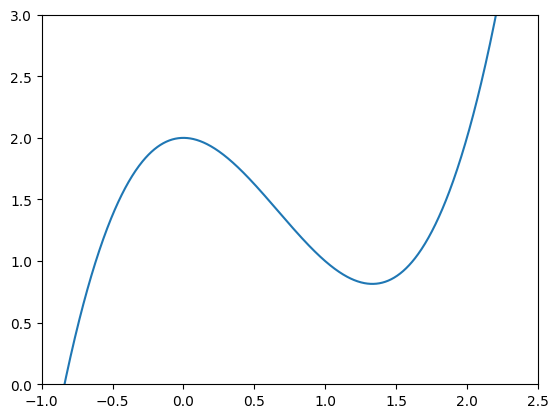

In [4]:
f = lambda x: x**3 - 2 * x**2 + 2
x = np.linspace(-1, 2.5, 1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

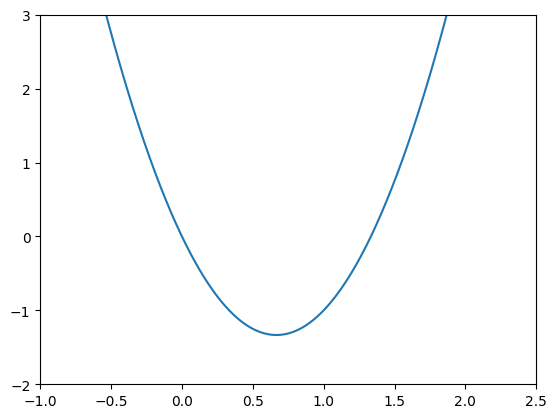

In [5]:
f_prime = lambda x: 3 * x**2 - 4 * x
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [6]:
lr = 0.1
points = [2]
n_epochs = 15

In [7]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [8]:
y_points = [f(p) for p in points]

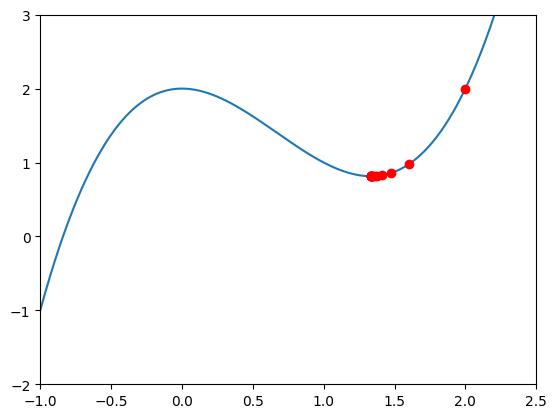

In [9]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

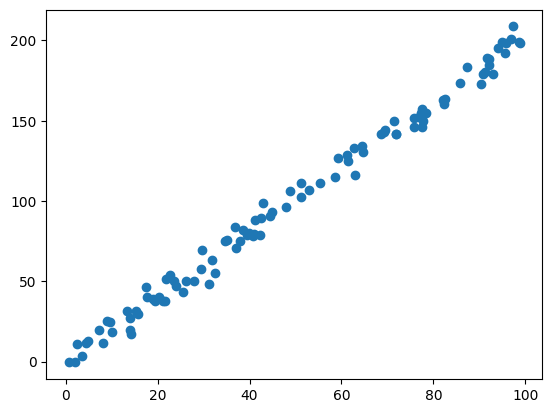

In [10]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

In [11]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [12]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += (pred - y[i]) ** 2
    return total_cost / len(X)

$$Loss = (θ_0 + θ_1 * x - y)^2 $$

$$\frac{dLoss}{dθ_0} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot 1 $$


$$\frac{dLoss}{dθ_1} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot x $$

In [13]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i])
    return total_cost / len(X)    

In [14]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i]) * X[i]
    return total_cost / (len(X))  

In [15]:
theta0 = 1
theta1 = 1

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.009866421436477 t1: 1.6670089870437148 cost: 412.0042225127244
t0: 1.013158979989686 t1: 1.8916817991106911 cost: 74.52867468252806
t0: 1.0142372293226074 t1: 1.9673600522408377 cost: 36.239286282337254
t0: 1.014569622190807 t1: 1.9928516377281194 cost: 31.895021946545523
t0: 1.0146507857193927 t1: 2.001438568243496 cost: 31.40211039554249
t0: 1.0146473279193335 t1: 2.0043314095922287 cost: 31.34616641332562
t0: 1.0146153682953651 t1: 2.005306279129857 cost: 31.33979998835573
t0: 1.014573809892928 t1: 2.0056351075091703 cost: 31.33905854599734
t0: 1.0145290199300738 t1: 2.0057463262202893 cost: 31.338955306107277
t0: 1.0144831431122547 t1: 2.005784246229639 cost: 31.338924477570764
t0: 1.0144369018524717 t1: 2.005797476604272 cost: 31.338901866744305
t0: 1.0143905394850339 t1: 2.005802390607138 cost: 31.338880190332187
t0: 1.0143441379735039 t1: 2.0058045033356446 cost: 31.33885862198461
t0: 1.0142977249260372 t1: 2.0058056724707876 cost: 31.338837067945143
t0: 1.0142513096419543

In [16]:
cost_function(X,Y,10,10)

219051.70264603675

$$Loss = \frac{1}{n}||Xw - Y||^{2}$$


где используется $L_{2}$ норма:

$$||X w - Y|| = \sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} $$

$$MSE = \frac{1}{n}\sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} ^{2} = \frac{1}{n}\sum_{i=1}^n{(X_iw - y_i)^2}$$

Градиент:

$$\frac{∂ MSE}{∂ w_0} = \frac{2}{n}\sum{({Xw - y})}$$

$$\frac{∂ MSE}{∂ w} = \frac{2}{n}\sum{({Xw - y}) \cdot X}$$


In [17]:
EPOCHS = 20
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)

list_params_gd = [params.copy()]
for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) * (2/len(predictions))
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) * (2/len(predictions))    

    list_params_gd.append(params.copy())

[ 0.00110855 -0.28954407]


In [18]:
costs[-1]

31.141072471239127

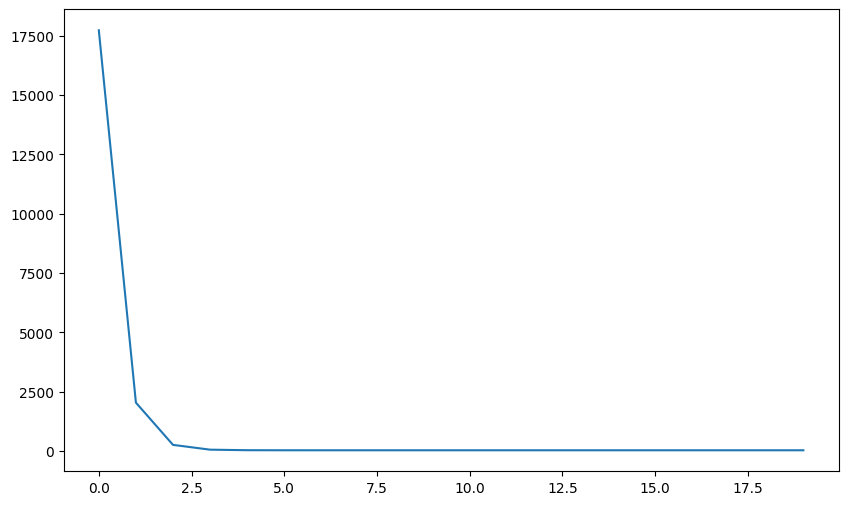

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.show()

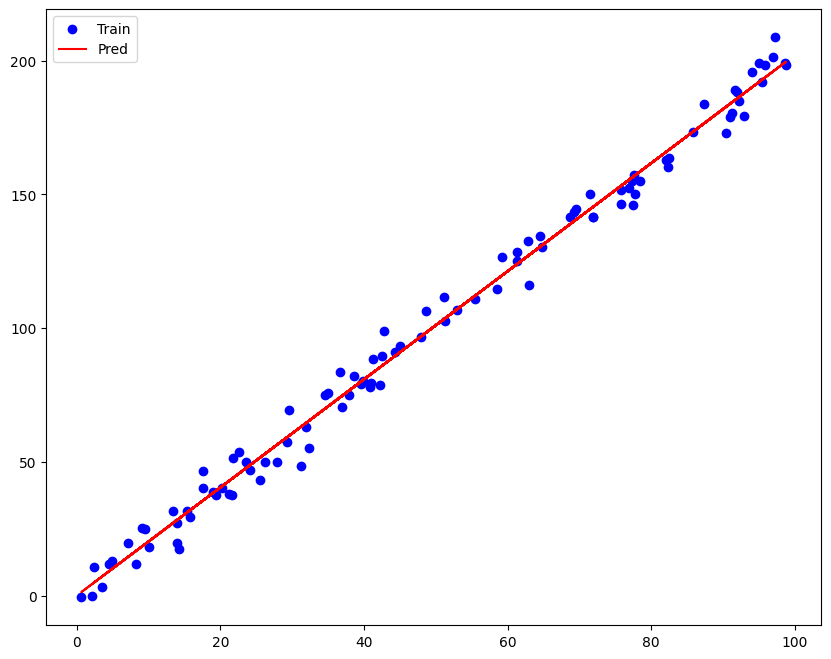

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, color='blue', label='Train')
plt.plot(X, preds[10], color='red', label='Pred')
plt.legend()
plt.show()

In [21]:
params

array([0.0355579 , 2.02035165])

## Метод стохастического градиентного спуска

In [22]:
EPOCHS = 100
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)
list_params_sgd = [params.copy()]

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * np.sum(current_prediction - Y[i]) * 2
    params[1] -= LEARNING_RATE * np.sum((current_prediction - Y[i]) * X[i]) * 2

    list_params_sgd.append(params.copy())

[ 0.00110855 -0.28954407]


In [23]:
costs[-1]

56.96695856897782

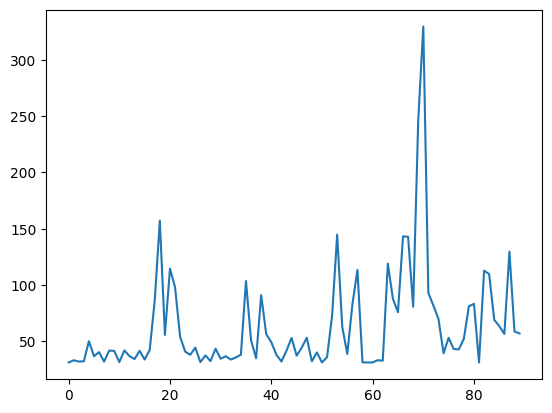

In [24]:
plt.plot(costs[10:])
plt.show()

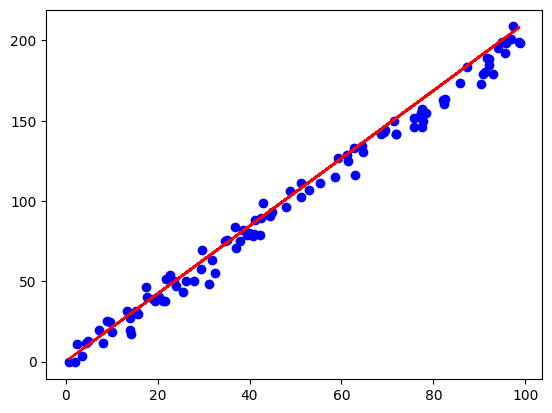

In [25]:
plt.scatter(X, Y, color='blue')
plt.plot(X, preds[-1], color='red')
plt.show()

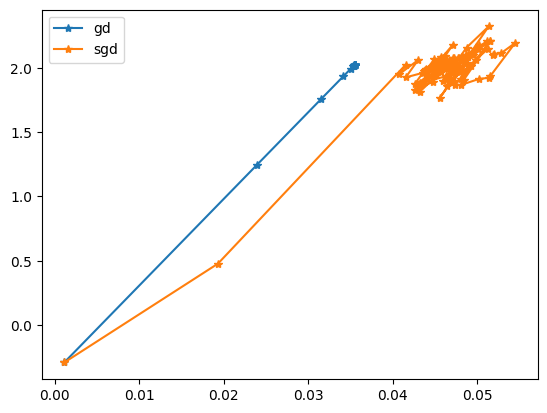

In [26]:
list_params_sgd = np.array(list_params_sgd)
list_params_gd = np.array(list_params_gd)

plt.plot(list_params_gd[:, 0], list_params_gd[:, 1], marker='*', label='gd')
plt.plot(list_params_sgd[:, 0], list_params_sgd[:, 1], marker='*', label='sgd')
plt.legend()
plt.show()